# Introduction

This data shows information about students in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.

# My hypothesis

I hypothesize that higher first period (G1) and second period (G2) grades strongly predict a higher final grade (G3) and a lower likelihood of failure (G3 < 10). In Portugal’s secondary education system, grades are recorded across three periods (G1, G2, G3), with G3 as the final assessment.

# Importing Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


In [2]:
path_math = "student-mat.csv"
path_port = "student-por.csv"

# reading our CSV file
math = pd.read_csv(path_math, sep=";")
port = pd.read_csv(path_port, sep=";")

# creating a subject table to be able to tell them apart when joining our tables
math['subject'] = 'mathematics'
port['subject'] = 'portuguese'
data = pd.concat([math, port])
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

# Understanding our Variables

## Overview of the Portuguese Educational System

- In Portugal, secondary education (ages 15-18) is compulsory and includes grades 10-12, preparing students for higher education or vocational paths.
- Grades are given on a 0-20 scale, common in high schools and universities, where:
  - 0-9 is failing,
  - 10-20 is passing
  - 20 is excellent, so its rarely given out

## Key Variables and Their Meanings

Below are the main variables from our dataset, which can be seen in student.txt but I decided to add here for easy access:

- **School**: Indicates whether the student attends "GP" (Gabriel Pereira) or "MS" (Mousinho da Silveira)
- **Sex**: Male or female
- **Age**: Typically 15-18
- **Address**: Urban or rural
- **Famsize**: Family size (e.g., ≤3 or >3)
- **Pstatus**: Parents cohabitation status (living together or apart)
- **Medu (Mother's Education)**: Rated 0-4
- **Fedu (Father's Education)**: rated 0-4
- **Mjob (Mother's Job), Fjob (Father's Job)**: Job categories like teacher, health care, services
- **Reason**: Reason for choosing school (e.g., home, reputation), showing parental or student priorities in school selection.
- **Guardian**: Who the student lives with (e.g., mother, father, other), affecting daily support.
- **Traveltime**: Time to school (e.g., 1=≤15 min, 4=>60 min)
- **Studytime**: Weekly study time (1=2-5 hours to 4=>10 hours), a direct measure of effort
- **Failures**: Number of past class failures, indicating prior academic struggles
- **Schoolsup**: Extra educational support (yes/no)
- **Famsup**: Family educational support (yes/no)
- **Paid**: Extra paid classes within the course subject (yes/no)
- **Activities**: Extracurricular activities (yes/no)
- **Nursery**: Attended nursery school (yes/no)
- **Higher**: Wants to take higher education (yes/no)
- **Internet**: Internet access at home (yes/no)
- **Romantic**: In a romantic relationship (yes/no), potentially affecting focus and time management.
- **Famrel (Family Relationships)**: Rated 1-5 (very bad to excellent), measuring family support quality
- **Freetime**: Free time after school (1-5, very low to very high)
- **Goout**: Going out with friends (1-5, very low to very high)
- **Dalc (Workday Alcohol Consumption)**: Rated 1-5 (very low to very high), measuring weekday alcohol use
- **Walc (Weekend Alcohol Consumption)**: Similar to Dalc but for weekends
- **Health**: Current health status (1-5, very bad to very good)
- **Absences**: Number of school absences
- **G1, G2, G3**: First period, second period, and final grades (0-20 scale), core outcomes where 10 is passing, reflecting academic achievement in Math or Portuguese courses.

# Transforming our Data

In [3]:
# Convert numeric 'traveltime' values into categorical labels.
data['traveltime'] = data['traveltime'].map({
    1: '<15m',   # If traveltime is 1, label as "<15m"
    2: '15-30m', # If traveltime is 2, label as "15-30m"
    3: '30-1h',  # If traveltime is 3, label as "30-1h"
    4: '>1h'     # If traveltime is 4, label as ">1h"
})
# Convert numeric 'studytime' values into categorical labels.
data['studytime'] = data['studytime'].map({
    1: '<2h',   # If studytime is 1, label as "<2h"
    2: '2-5h',  # If studytime is 2, label as "2-5h"
    3: '5-10h', # If studytime is 3, label as "5-10h"
    4: '>10h'   # If studytime is 4, label as ">10h"
})
data['traveltime'], data['studytime']

(0      15-30m
 1        <15m
 2        <15m
 3        <15m
 4        <15m
         ...  
 644      <15m
 645      <15m
 646    15-30m
 647    15-30m
 648     30-1h
 Name: traveltime, Length: 1044, dtype: object,
 0       2-5h
 1       2-5h
 2       2-5h
 3      5-10h
 4       2-5h
        ...  
 644    5-10h
 645     2-5h
 646     2-5h
 647      <2h
 648      <2h
 Name: studytime, Length: 1044, dtype: object)

# Initial Visualizations

### Grade Distribution
The following bar charts look at the grade distributions per term (G1, G2, G3)

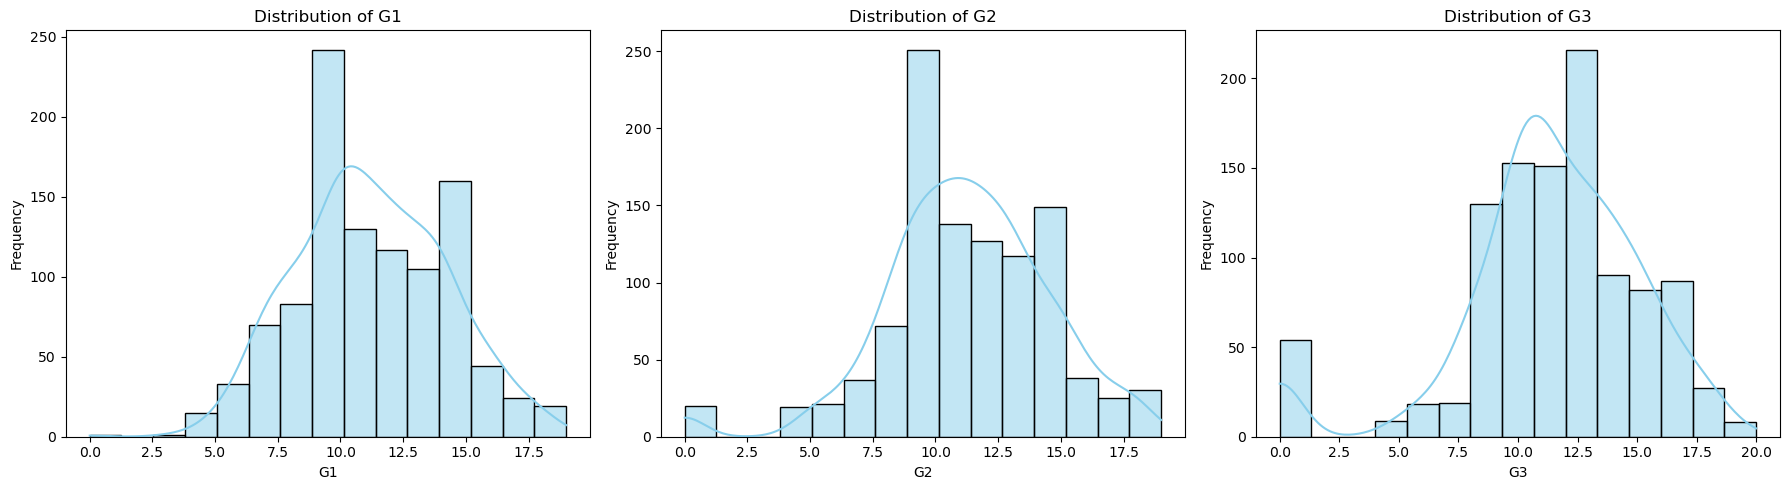

In [4]:
# Create histograms with KDE for G1, G2, and G3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, grade in zip(axes, ['G1', 'G2', 'G3']):
    sns.histplot(data=data, x=grade, kde=True, ax=ax, bins=15, color='skyblue')
    ax.set_title(f"Distribution of {grade}")
    ax.set_xlabel(grade)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Observation
- The distributions of G1, G2, and G3 are slightly skewed, with most students scoring around the middle range.  
- There is a noticeable drop in frequency as grades approach the extremes (very low or very high).  
- The final grades (G3) appear to have a slightly tighter distribution compared to G1 and G2, indicating less variability in final assessments
- As time increases the number of students failing also increases 

### Bar Charts for Mean Grades by Group
The following bar charts compare the mean final grade (G3) among different groups:

1. **By Sex:** How the mean final grade varies between male and female students.  
2. **By Study Time:** How different study time categories relate to the mean final grade.  
3. **By Family Support:** How having family support (famsup) affects the mean final grade.  


/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/3958398092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=mean_by_sex, palette='muted')


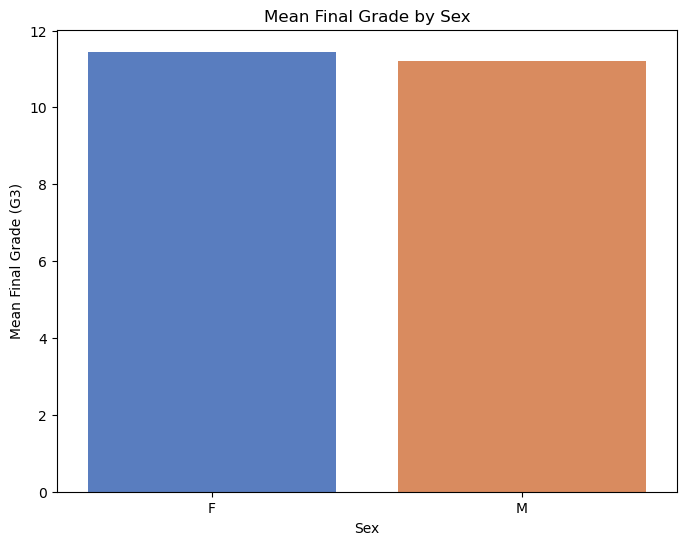

In [5]:
mean_by_sex = data.groupby('sex')['G3'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='G3', data=mean_by_sex, palette='muted')
plt.xlabel("Sex")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean Final Grade by Sex")
plt.show()


Observations
- Female students have a slightly higher mean final grade (11.45) compared to male students (11.20).


/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/405034923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='studytime', y='G3', data=mean_by_studytime, palette='pastel')


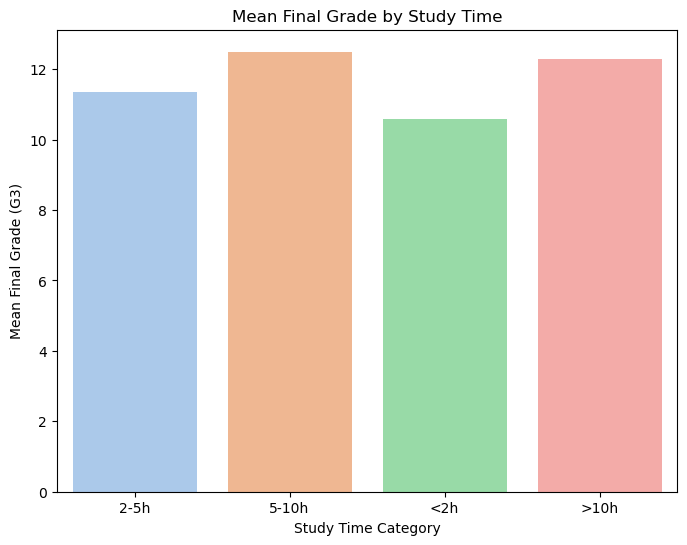

In [6]:
mean_by_studytime = data.groupby('studytime')['G3'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='studytime', y='G3', data=mean_by_studytime, palette='pastel')
plt.xlabel("Study Time Category")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean Final Grade by Study Time")
plt.show()


Observations:
- Students who study for 5-10 hours per week have the highest mean final grade (12.49), while those studying less than 2 hours have the lowest (10.58).
mean_by_famsup = data.groupby('famsup')['G3'].mean().reset_index()


/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/3202883644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='famsup', y='G3', data=mean_by_famsup, palette='deep')


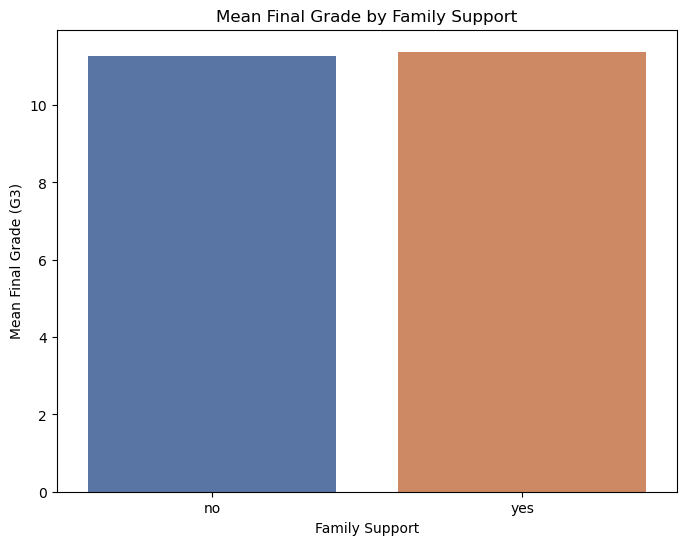

In [8]:
mean_by_famsup = data.groupby('famsup')['G3'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='famsup', y='G3', data=mean_by_famsup, palette='deep')
plt.xlabel("Family Support")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean Final Grade by Family Support")
plt.show()


Observation: 
 - Students with family support have a slightly higher mean final grade (11.38) compared to those without family support (11.28).

### Count Plot: Reasons for Choosing the School
This plot displays a count of the different reasons students chose their school. 


/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/2410410925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='reason',data=data, order=data['reason'].value_counts().index, palette="Blues_d")
/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/2410410925.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(('Course Preference', 'Close to Home', 'School Reputation', 'Other'))


Text(0.5, 1.0, 'Reason For Choosing The School')

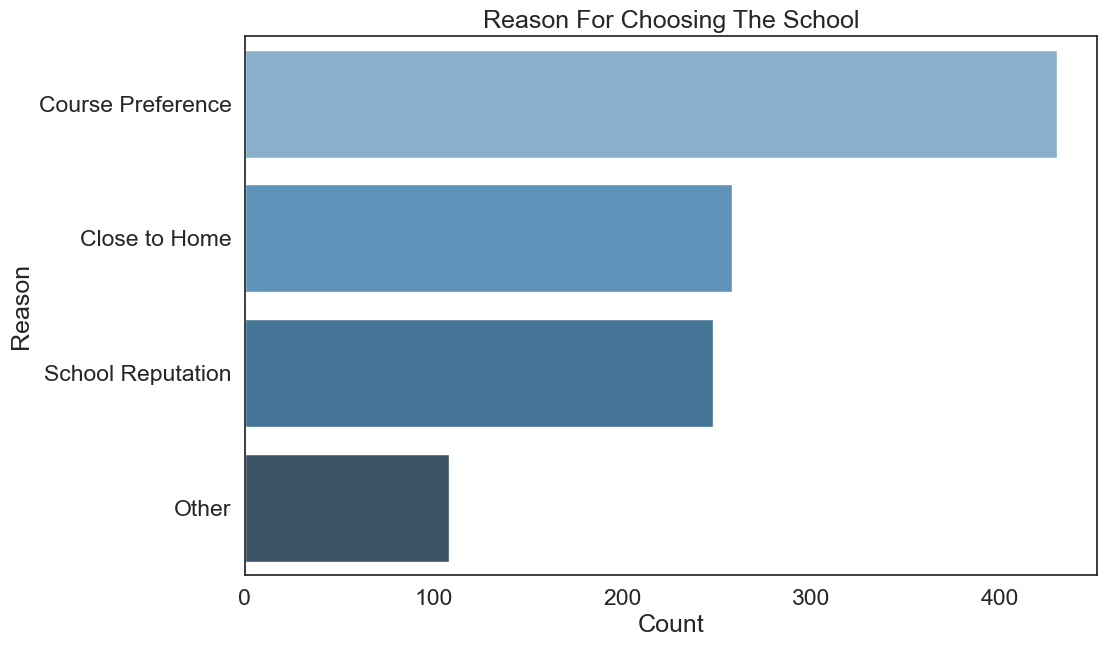

In [9]:
plt.figure(figsize=(11,7))
sns.set(font_scale=1.5)
sns.set_style('white')

ax = sns.countplot(y='reason',data=data, order=data['reason'].value_counts().index, palette="Blues_d")

ax.set_yticklabels(('Course Preference', 'Close to Home', 'School Reputation', 'Other'))
plt.ylabel('Reason')
plt.xlabel('Count')
plt.title('Reason For Choosing The School')



#### Observations:

- We observe that the primary reason for choosing the school is course preference, with approximately 430 responses. The next most common reason is proximity to home (around 250), followed by school reputation and other reasons. This indicates that the offered courses are a greater draw for students than the school's name or brand.

### Bar Plot: Comparison of Final Grades between Subjects by Sex

This bar plot compares the final grades (G3) across subjects (Mathematics and Portuguese).


/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/3861008800.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('Mathematics', 'Portuguese'))


Text(0.5, 1.0, 'Comparison of grades between men and women by subject')

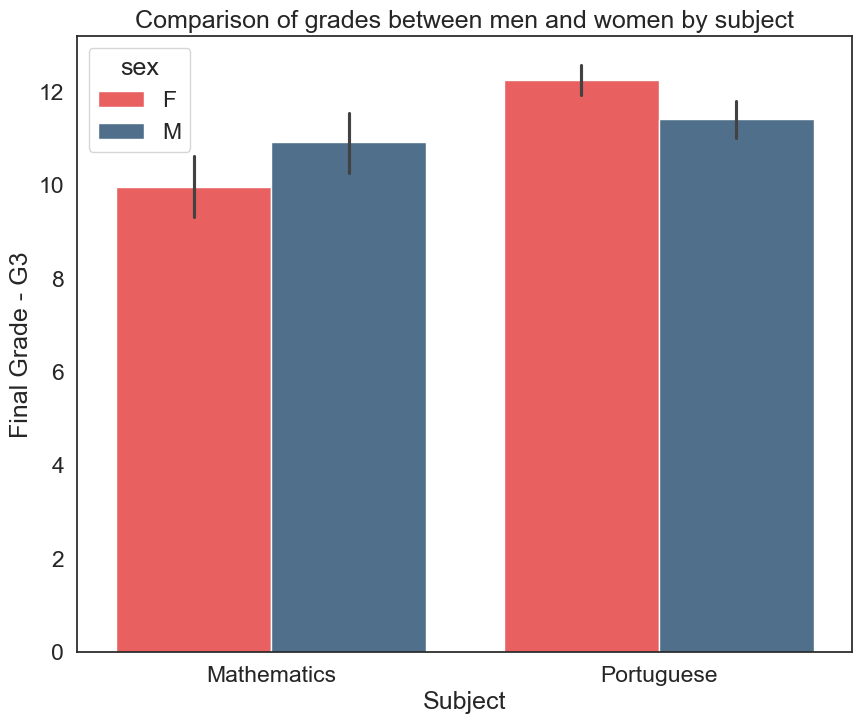

In [13]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.set_style('white')

ax = sns.barplot(x='subject', y='G3', hue='sex', data=data, palette=["#ff4949", "#456f95"])
ax.set_xticklabels(('Mathematics', 'Portuguese'))
plt.xlabel('Subject')
plt.ylabel('Final Grade - G3')
plt.title('Comparison of grades between men and women by subject')

#### Observations 
- We can observe that in Mathematics, females score lower on average compared to males, whereas in Portuguese the trend is reversed with females scoring higher than males.


### Heatmap: Correlation between Grade Periods (G1,G2,G3) and absences
The heatmap provides a visual representation of the correlation between the numeric columns (`G1`, `G2`, `G3`, and `absences`). 



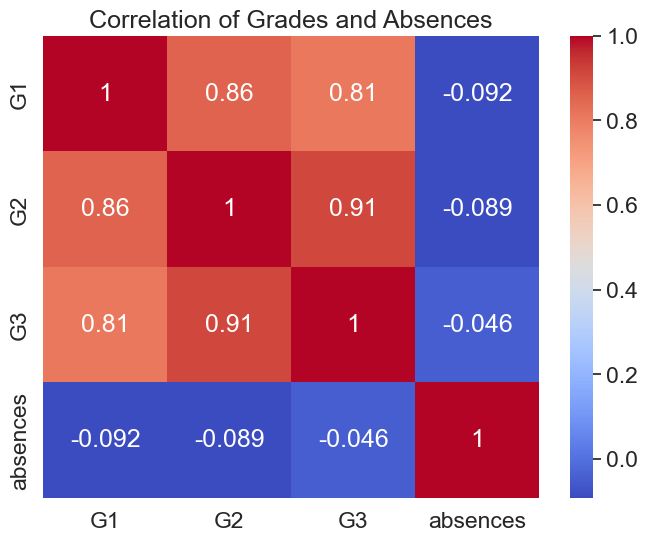

In [10]:
num_cols = ['G1', 'G2', 'G3', 'absences']
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Grades and Absences")
plt.show()


#### Observations
- High correlations among grades:
G1, G2, and G3 all show strong positive correlations. This suggests that students who perform well on early assessments (G1 and G2) tend also to do well on their final grade (G3).

- Absences and grades:
The correlation between absences and grades appears  negative. This indicates that while there might be a slight tendency for more absences to be associated with lower performance, the relationship isn’t as strong as the correlations among the grades.

# Testing my Hypothesis

In [11]:
# Separate final grades (G3) by school type.
g3_gp = data[data['school'] == 'GP']['G3']
g3_ms = data[data['school'] == 'MS']['G3']

# Perform an independent-sample t-test.
t_stat, p_value = ttest_ind(g3_gp, g3_ms, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: There is evidence that the two schools differ in their academic performance, as measured by G3.")
else:
    print("Fail to reject H₀: There is no evidence that the two schools genuinely differ in their academic performance, as measured by G3.")

T-statistic: 4.136797983297116
P-value: 3.8056071791518344e-05
Reject H₀: There is evidence that the two schools differ in their academic performance, as measured by G3.


/var/folders/hr/dgxfxpfj6s71m_vn6q84lz6r0000gn/T/ipykernel_75217/2372762553.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('Gabriel Pereira', 'Mousinho da Silva'))


Text(0.5, 1.0, 'Comparison Of Grades Between Schools')

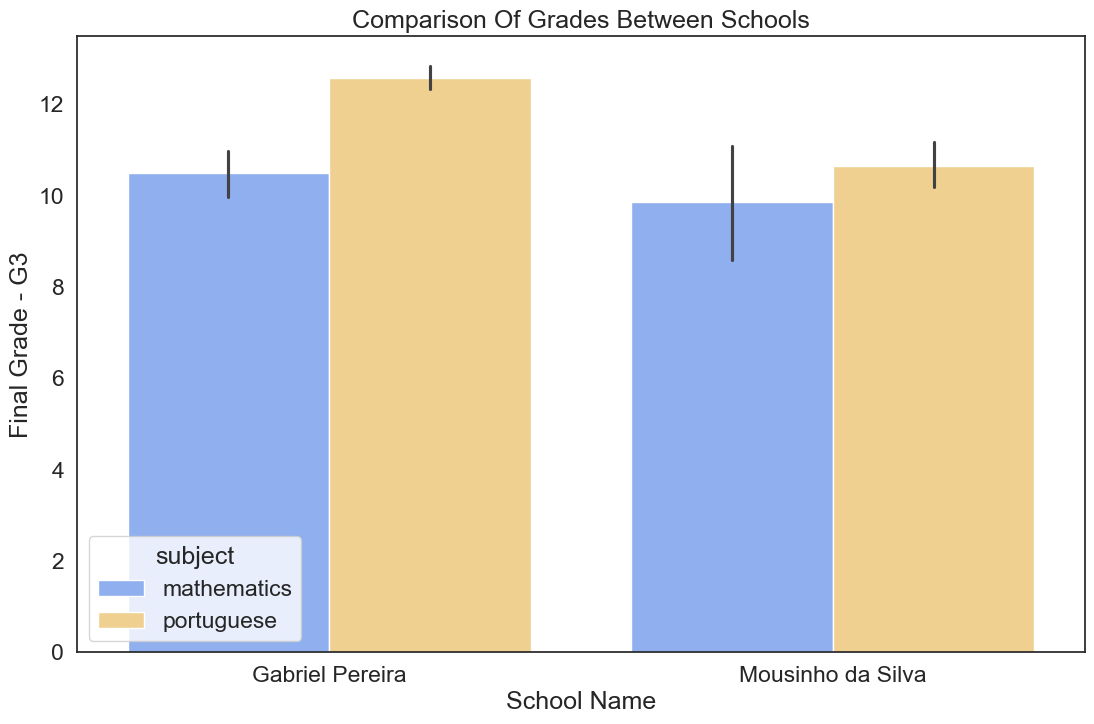

In [12]:
plt.figure(figsize=(13,8))
sns.set(font_scale=1.5)
sns.set_style('white')

ax = sns.barplot(x='school', y='G3', hue='subject', data=data, palette=['#80aaff', '#ffd580'])

ax.set_xticklabels(('Gabriel Pereira', 'Mousinho da Silva'))
plt.xlabel('School Name')
plt.ylabel('Final Grade - G3')
plt.title('Comparison Of Grades Between Schools')


## Observation
- We can see that Gabriel Pereira achieves higher final grades in both Mathematics and Portuguese compared to Mousinho da Silva. Additionally, while Mousinho da Silva exhibits a larger variance in Mathematics—resulting in a wider range of scores that sometimes exceed Gabriel Pereira's—in Portuguese, Gabriel Pereira consistently outperforms Mousinho da Silva.